Функции минимизации

In [ ]:
import math
from functools import cache
import numpy as np
import pandas as pd
from pandas import MultiIndex
import matplotlib.pyplot as plt

def dichotomy_minimize(f, search_range, E, precision, verbose=False):

    if verbose:
        print(f'E = {E}')

    l, r = search_range
    delta = E / 2
    iter_num = 0
    f_calculactions = 0
    while r - l > E:

        iter_num += 1

        if verbose:
            print(f'[{round(l, precision+1)}; {round(r, precision+1)}]')

        m1 = (l + r - delta) / 2
        m2 = (l + r + delta) / 2
        f1, f2 = f(m1), f(m2)
        f_calculactions += 2

        if f1 > f2:
            y_min = f2
            l = m1
        else:
            y_min = f1
            r = m2

    return y_min, iter_num, f_calculactions

# References:
#   https://intuit.ru/studies/courses/1020/188/lecture/4929?page=2
#   https://studfile.net/preview/3653072/page:13/
def fibonacci_minimize(f, search_range, iterations, E_targets, precisions, verbose=False):
    if verbose:
        print(f'iterations = {iterations}')

    l, r = search_range
    n = iterations
    x1 = l + (r - l) * fibonacci(n-1) / fibonacci(n+1) # точки x1 и x2 всегда симметричны относительно центра области поиска
    x2 = l + (r - l) * fibonacci(n) / fibonacci(n+1)
    f1, f2 = f(x1), f(x2)
    f_calculactions = 2

    E_target_idx = 0
    E_target = E_targets[E_target_idx]
    precision = precisions[E_target_idx]
    log = [] # сохранение (y_min, iterations, function_calculations) по достижении target_E
    for iter_num in range(1, iterations):
        if f1 > f2:
            l = x1
            y_min = f2
            x1 = x2
            f1 = f2
            x2 = r - (x1 - l)
            f2 = f(x2)
        else:
            r = x2
            y_min = f1
            x2 = x1
            f2 = f1
            x1 = l + (r - x2)
            f1 = f(x1)
        if x1 > x2:
            x1, f1, x2, f2 = x2, f2, x1, f1

        f_calculactions += 1

        if verbose:
            print(f'[{round(l, precision+1)}; {round(r, precision+1)}]')

        if r - l <= E_target:
            log.append((y_min, iter_num, f_calculactions))
            E_target_idx += 1
            if len(log) == len(E_targets):
                return log
            E_target = E_targets[E_target_idx]
            precision = precisions[E_target_idx]

    # последняя итерация не требует вычисления функции
    if f1 > f2:
        l = x1
        y_min = f2
    else:
        r = x2
        y_min = f1

    if verbose:
        print(f'[{round(l, precision+1)}; {round(r, precision+1)}]')

    if r - l <= E_target:
        log.append((y_min, iterations, f_calculactions))
        E_target_idx += 1

    return log

@cache
def fibonacci(n):
    if n <= 2:
        return 1

    return fibonacci(n-2) + fibonacci(n-1)


def golden_ration_minimize(f, search_range, E, precision, verbose=False):
    if verbose:
        print(f'E = {E}')

    l, r = search_range
    iter_num = 0
    x1 = l + 0.381966011*(r - l)
    x2 = l + 0.618033989*(r - l)
    f1 = f(x1)
    f2 = f(x2)
    f_calculactions = 2
    while r - l > E:
        iter_num += 1

        if verbose:
            print(f'[{round(l, precision+1)}; {round(r, precision+1)}]')

        if f1 >= f2:
            y_min = f2
            l = x1
            x1 = x2
            x2 = l + (r - x2)
            f1 = f2
            f2 = f(x2)
        else:
            y_min = f1
            r = x2
            x2 = x1
            x1 = r - (x1 - l)
            f2 = f1
            f1 = f(x1)

        f_calculactions += 1

    return y_min, iter_num, f_calculactions

def parabolas_minimize(f, search_range, E, precision, x1=None, verbose=False):
    if verbose:
        print(f'E = {E}')

    l, r = search_range
    if x1 is None:
        x1 = (l + r) / 2
    fl, f1, fr = f(l), f(x1), f(r)
    f_calculations = 3

    get_forth_point = lambda l, x1, r, fl, f1, fr: x1 - ( ((x1-l)**2)*(f1-fr) - ((x1-r)**2)*(f1-fl) ) / ( 2*((x1-l)*(f1-fr) - (x1-r)*(f1-fl)) )

    iter_num = 0
    while r - l > E:
        iter_num += 1

        x2 = get_forth_point(l, x1, r, fl, f1, fr)
        f2 = f(x2)
        f_calculations += 1
        if x1 > x2: # ensure invariant: x1 < x2
            x1, f1, x2, f2 = x2, f2, x1, f1

        if verbose:
            print(f'[{round(l, precision+1)}; {round(r, precision+1)}]')

        if f1 > f2:
            y_min = f2
            l = x1
            fl = f1
            x1 = x2
            f1 = f2
        else:
            y_min = f1
            r = x2
            fr = f2

    return y_min, iter_num, f_calculations

def brent_minimize(f, search_range, E, precision, verbose=False):
    if verbose:
      print(f'E = {E}')

    a, c = search_range

    iter_num = 0
    f_calculactions = 0

    K = 0.381966011
    x = (a + c) / 2
    w = x
    v = x

    fx = f(x)
    fw = fx
    fv = fx

    f_calculactions += 1

    d = c - a
    e = d

    while c - a >= E:
        iter_num += 1
        if verbose:
            print(f'[{round(a, precision+1)}; {round(c, precision+1)}]')

        g = e
        e = d
        parabola_fit = False
        f_calculactions += 1

        if abs(x - (a + c) / 2) + (c - a) / 2 <= 2 * E:
            break

        if (x != w) and (x != v) and (w != v) and (fx != fw) and (fx != fv) and (fw != fv):
            f_val = dict()
            f_val[x] = fx
            f_val[w] = fw
            f_val[v] = fv

            l = sorted([x, w, v])[0]
            m = sorted([x, w, v])[1]
            r = sorted([x, w, v])[2]

            f1, f2, f3 = f_val[l], f_val[m], f_val[r]

            u = m - ((m - l) ** 2 * (f2 - f3) - (m - r) ** 2 * (f2 - f1)) / (
                        2 * ((m - l) * (f2 - f3) - (m - r) * (f2 - f1)))

            if u >= a + E and u <= c - E and abs(u - x) < g / 2:
                d = abs(u - x)
                parabola_fit = True

                if (u - a < 2 * E) or (c - u) < 2 * E:
                    u = x - np.sign(x - (a + c) / 2) * E

        if not parabola_fit:
            if x < (c + a) / 2:
                u = x + K * (c - x)
                d = c - x
            else:
                u = x - K * (x - a)
                d = x - a
        if abs(u - x) < E:
            u = x + np.sign(u - x) * E

        fu = f(u)
        #f_calculactions += 1

        if fu <= fx:
            if u >= x:
                a = x
            else:
                c = x
            v = w
            w = x
            x = u
            fv = fw
            fw = fx
            fx = fu
        else:
            if u >= x:
                c = u
            else:
                a = u
            if fu <= fw or w == x:
                v = w
                w = u
                fv = fw
                fw = fu
            elif fu <= fv or v == x or v == w:
                v = u
                fv = fu

    return y_min, iter_num, f_calculactions


Дана функция y(x) = sin(x) - ln(x^2) - 1

Выбрав участок на ней, необходимо найти его минимум.

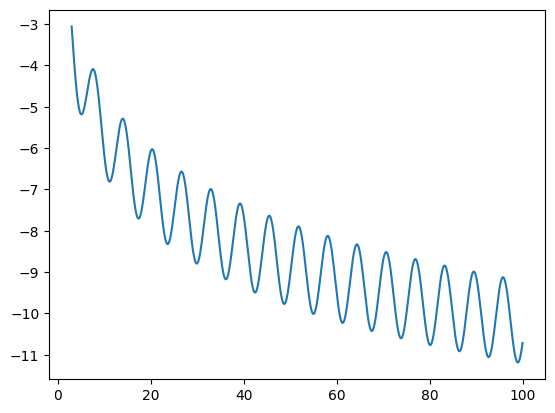

In [ ]:
f = lambda x: math.sin(x) - math.log(x**2) - 1
xs = np.linspace(3, 100, 1000)
ys = [f(x) for x in xs]

plt.plot(xs, ys)
plt.show()

y`(x) = cos(x) - 2/x

y``(x) = -sin(x) + 2/(x^2)

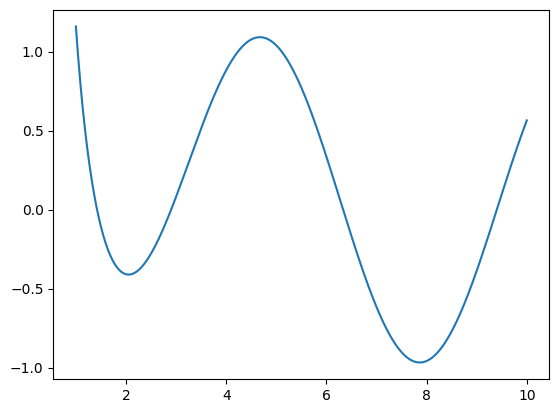

In [ ]:
ddf = lambda x: -math.sin(x) + 2/(x**2)
xs = np.linspace(1, 10, 1000)
ys = [ddf(x) for x in xs]

plt.plot(xs, ys)
plt.show()

Пусть участком исследования будет [a; b] = [3; 6]. На данном участке вторая производная
функции неотрицательна, значит функция является унимодальной.

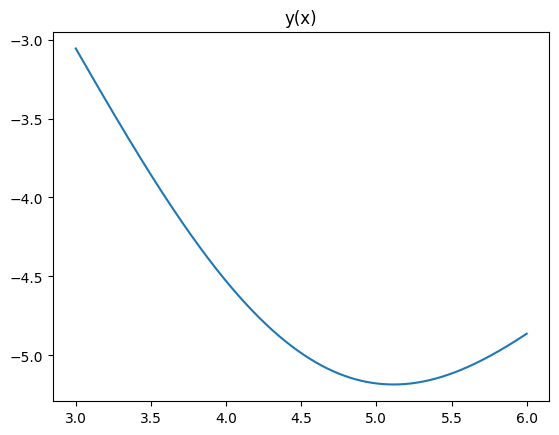

min(y(x)) on [a; b] = 0.081102214162355


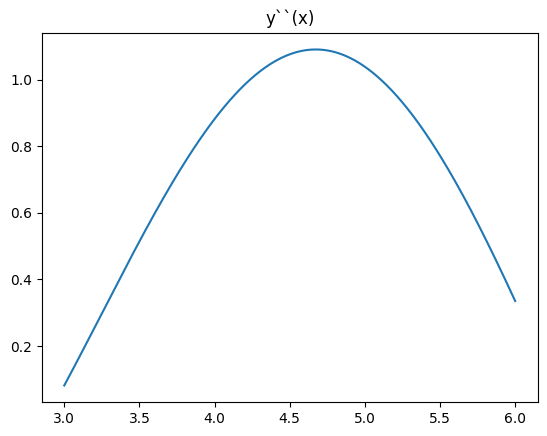

In [ ]:
search_range = 3, 6

xs = np.linspace(*search_range, 10000)

ys = [f(x) for x in xs]
plt.title("y(x)")
plt.plot(xs, ys)
plt.show()

ys = [ddf(x) for x in xs]
print(f'min(y(x)) on [a; b] = {min(ys)}')
plt.title("y``(x)")
plt.plot(xs, ys)
plt.show()

Произведем вычисление минимума функции на заданном промежутке использую разные алгоритмы и сравним результаты.

In [ ]:
precisions = list(range(1, 11))
Es = list(10**(-precision) for precision in precisions)

index = MultiIndex.from_product([['dichotomy', 'golden_ration', 'fibonacci', 'parabols', 'brent'], Es], names=['algorithm', 'E'])
results = pd.DataFrame(columns=['y_min', 'iterations', 'function_calculations'], index=index)

Метод дихотомии, золотого сечения, парабол

In [ ]:

algorithms = {
    'dichotomy': dichotomy_minimize,
    'golden_ration': golden_ration_minimize,
    'parabols': parabolas_minimize,
    'brent' : brent_minimize,
}
algorithm_kwargs = {
    # Т.к. алгоритм парабол не имеет гарантии сходимости, для его демонстрации была подобрана
    # стартовая точка x1 в окрестности минимума.
    'parabols': {'x1': 5}
}

for algorithm_name, min_function in algorithms.items():
    print(algorithm_name)
    for E, precision in zip(Es, precisions):
        kwargs = algorithm_kwargs.get(algorithm_name, {})
        y_min, iterations, function_calculations = min_function(f, search_range, E, precision, verbose=True, **kwargs)
        results.loc[algorithm_name, E] = {
            'y_min': y_min,
            'iterations': iterations,
            'function_calculations': function_calculations}

    #     print(f'y_min = {round(y_min, precision)} (E = {E})')
    # print()

dichotomy
E = 0.1
[3; 6]
[4.47; 6]
[4.47; 5.26]
[4.84; 5.26]
[5.03; 5.26]
[5.03; 5.17]
E = 0.01
[3; 6]
[4.497; 6]
[4.497; 5.251]
[4.872; 5.251]
[5.059; 5.251]
[5.059; 5.158]
[5.106; 5.158]
[5.106; 5.134]
[5.106; 5.123]
[5.106; 5.117]
E = 0.001
[3; 6]
[4.4997; 6]
[4.4997; 5.2501]
[4.8747; 5.2501]
[5.0622; 5.2501]
[5.0622; 5.1564]
[5.109; 5.1564]
[5.109; 5.133]
[5.109; 5.1212]
[5.109; 5.1154]
[5.112; 5.1154]
[5.1134; 5.1154]
[5.1134; 5.1146]
E = 0.0001
[3; 6]
[4.49998; 6]
[4.49998; 5.25001]
[4.87497; 5.25001]
[5.06247; 5.25001]
[5.06247; 5.15626]
[5.10934; 5.15626]
[5.10934; 5.13283]
[5.10934; 5.12111]
[5.10934; 5.11525]
[5.11227; 5.11525]
[5.11373; 5.11525]
[5.11373; 5.11452]
[5.1141; 5.11452]
[5.1141; 5.11433]
[5.1141; 5.11424]
E = 1e-05
[3; 6]
[4.499998; 6]
[4.499998; 5.250001]
[4.874997; 5.250001]
[5.062497; 5.250001]
[5.062497; 5.156251]
[5.109371; 5.156251]
[5.109371; 5.132814]
[5.109371; 5.121095]
[5.109371; 5.115236]
[5.112301; 5.115236]
[5.113766; 5.115236]
[5.113766; 5.114503]


Метод Фиббоначи

Т.к. метод Фибоначчи предполагате изначальное ограничение по кол-ву итераций, то для сравнения
его с другими алгоритмами было подобрано число итенаций такое, чтобы достичь наибольшей точности из
рассматриваемых. По мере выполнения алгоритма сохраняется число итераций и кол-во вычислений функции,
при которых достигается очередная рассматриваемая точность.

In [ ]:
log = fibonacci_minimize(f, search_range, 58, Es, precisions, verbose=False)
for E, (y_min, iterations, function_calculations) in zip(Es, log):
    results.loc['fibonacci', E] = {
        'y_min': y_min,
        'iterations': iterations,
        'function_calculations': function_calculations}

In [ ]:
for E in Es:
    y_mins = results.query(f'E == {E}')['y_min']
    y_mins_range = max(y_mins) - min(y_mins)
    assert(y_mins_range <= 2 * E)

In [ ]:
results

y_min iterations function_calculations
algorithm     E                                                      
dichotomy     1.000000e-01 -5.184346        6.0                  12.0
              1.000000e-02 -5.184396       10.0                  20.0
              1.000000e-03 -5.184396       13.0                  26.0
              1.000000e-04 -5.184396       16.0                  32.0
              1.000000e-05 -5.184396       20.0                  40.0
              1.000000e-06 -5.184396       23.0                  46.0
              1.000000e-07 -5.184396       26.0                  52.0
              1.000000e-08 -5.184396       30.0                  60.0
              1.000000e-09 -5.184396       33.0                  66.0
              1.000000e-10 -5.184396       36.0                  72.0
golden_ration 1.000000e-01 -5.184342        8.0                  10.0
              1.000000e-02 -5.184396       12.0                  14.0
              1.000000e-03 -5.184396       17.0                  19.0
              1.000000e-04 -5.184396       22.0                  24.0
              1.000000e-05 -5.184396       24.0                  26.0
              1.000000e-06 -5.184396       24.0                  26.0
              1.000000e-07 -5.184396       24.0                  26.0
              1.000000e-08 -5.184396       24.0                  26.0
              1.000000e-09 -5.184396       24.0                  26.0
              1.000000e-10 -5.184396       24.0                  26.0
fibonacci     1.000000e-01 -5.184342        8.0                  10.0
              1.000000e-02 -5.184396       12.0                  14.0
              1.000000e-03 -5.184396       17.0                  19.0
              1.000000e-04 -5.184396       22.0                  24.0
              1.000000e-05 -5.184396       27.0                  29.0
              1.000000e-06 -5.184396       31.0                  33.0
              1.000000e-07 -5.184396       36.0                  38.0
              1.000000e-08 -5.184396       45.0                  47.0
              1.000000e-09 -5.184396       51.0                  53.0
              1.000000e-10 -5.184396       58.0                  59.0
parabols      1.000000e-01 -5.184396       19.0                  22.0
              1.000000e-02 -5.184396       19.0                  22.0
              1.000000e-03 -5.184396       19.0                  22.0
              1.000000e-04 -5.184396       19.0                  22.0
              1.000000e-05 -5.184396       20.0                  23.0
              1.000000e-06 -5.184396       23.0                  26.0
              1.000000e-07 -5.184396       26.0                  29.0
              1.000000e-08 -5.184396       31.0                  34.0
              1.000000e-09 -5.184396       37.0                  40.0
              1.000000e-10 -5.184396       42.0                  45.0
brent         1.000000e-01 -5.184396        6.0                   7.0
              1.000000e-02 -5.184396        9.0                  10.0
              1.000000e-03 -5.184396        7.0                   8.0
              1.000000e-04 -5.184396        9.0                  10.0
              1.000000e-05 -5.184396       12.0                  13.0
              1.000000e-06 -5.184396       14.0                  15.0
              1.000000e-07 -5.184396        8.0                   9.0
              1.000000e-08 -5.184396       11.0                  12.0
              1.000000e-09 -5.184396       17.0                  18.0
              1.000000e-10 -5.184396       22.0                  23.0